In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv("/Users/yeomsangyoon/Visual Studio/0_tensor/source/car_evaluation.csv", header=None, names= col_names)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 

Subject Count: 4


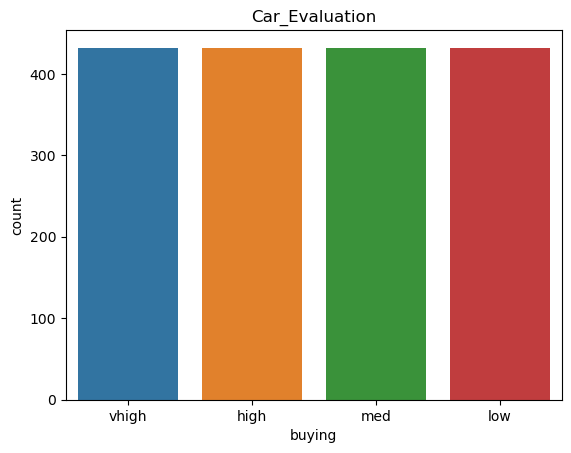

In [4]:
# buying 레이블 개수 확인 (숫자)
print(df['buying'].value_counts(),"\n")

# buying 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="buying")
plt.xlabel("buying")
plt.title("Car_Evaluation")

# buying subject 개수 확인
subject_count = df['buying'].nunique()
print("Subject Count:", subject_count)

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 

Subject Count: 4


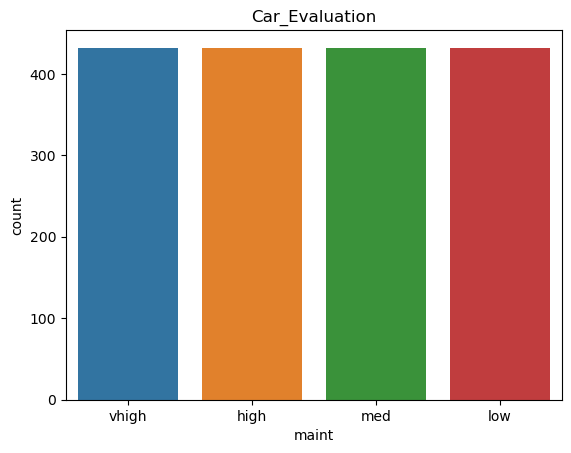

In [5]:
# maint 레이블 개수 확인 (숫자)
print(df['maint'].value_counts(),"\n")

# maint 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="maint")
plt.xlabel("maint")
plt.title("Car_Evaluation")

# maint subject 개수 확인
subject_count = df['maint'].nunique()
print("Subject Count:", subject_count)

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64 

Subject Count: 4


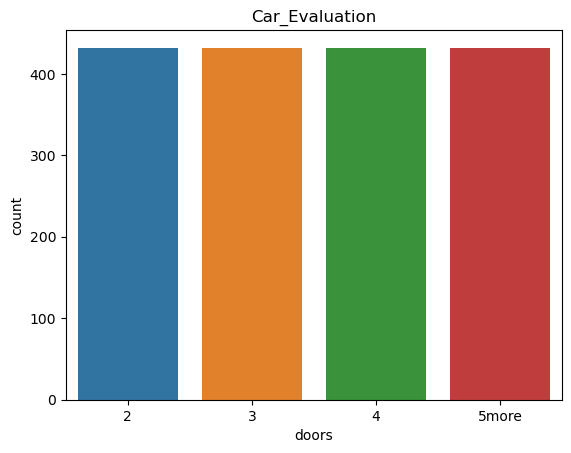

In [6]:
# doors 레이블 개수 확인 (숫자)
print(df['doors'].value_counts(),"\n")

# doors 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="doors")
plt.xlabel("doors")
plt.title("Car_Evaluation")

# doors subject 개수 확인
subject_count = df['doors'].nunique()
print("Subject Count:", subject_count)

persons
2       576
4       576
more    576
Name: count, dtype: int64 

Subject Count: 3


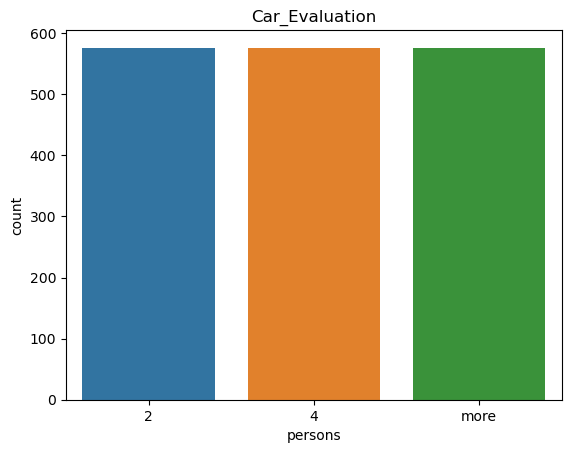

In [7]:
# persons 레이블 개수 확인 (숫자)
print(df['persons'].value_counts(),"\n")

# persons 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="persons")
plt.xlabel("persons")
plt.title("Car_Evaluation")

# persons subject 개수 확인
subject_count = df['persons'].nunique()
print("Subject Count:", subject_count)

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64 

Subject Count: 3


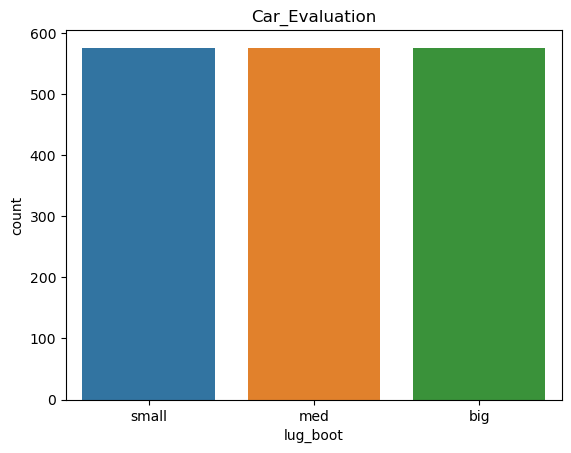

In [8]:
# lug_boot 레이블 개수 확인 (숫자)
print(df['lug_boot'].value_counts(),"\n")

# lug_boot 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="lug_boot")
plt.xlabel("lug_boot")
plt.title("Car_Evaluation")

# lug_boot subject 개수 확인
subject_count = df['lug_boot'].nunique()
print("Subject Count:", subject_count)

safety
low     576
med     576
high    576
Name: count, dtype: int64 

Subject Count: 3


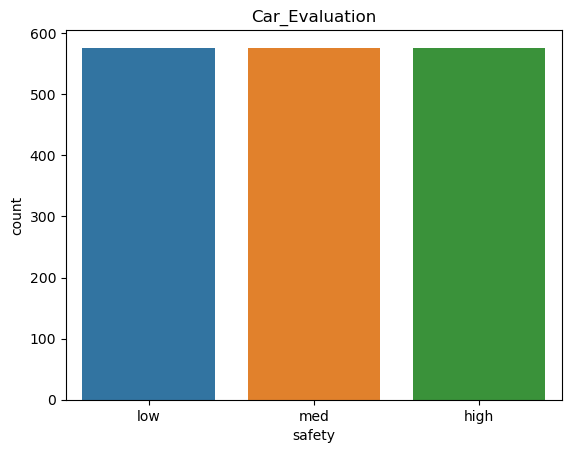

In [9]:
# safety 레이블 개수 확인 (숫자)
print(df['safety'].value_counts(),"\n")

# safety 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="safety")
plt.xlabel("safety")
plt.title("Car_Evaluation")

# safety subject 개수 확인
subject_count = df['safety'].nunique()
print("Subject Count:", subject_count)

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64 

Subject Count: 4


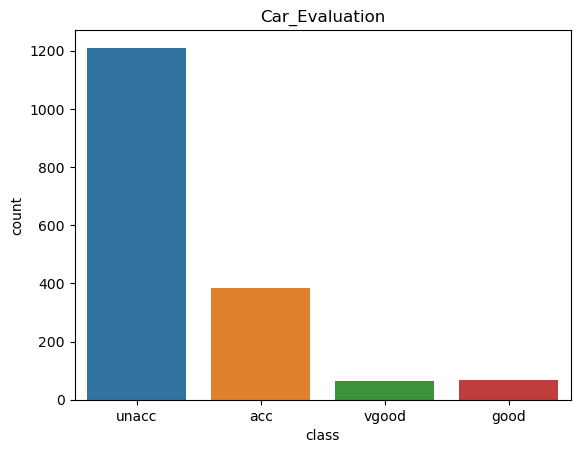

In [10]:
# class 레이블 개수 확인 (숫자)
print(df['class'].value_counts(),"\n")

# class 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("class")
plt.title("Car_Evaluation")

# class subject 개수 확인
subject_count = df['class'].nunique()
print("Subject Count:", subject_count)

In [11]:
# 라벨 인코딩 (문자형 데이터로 라벨링이 되어 있는 컬럼 데이터들 라벨링 필요.)
# Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])
df['class'] = label.fit_transform(df['class'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


Text(0.5, 1.0, 'Car_Evaluation')

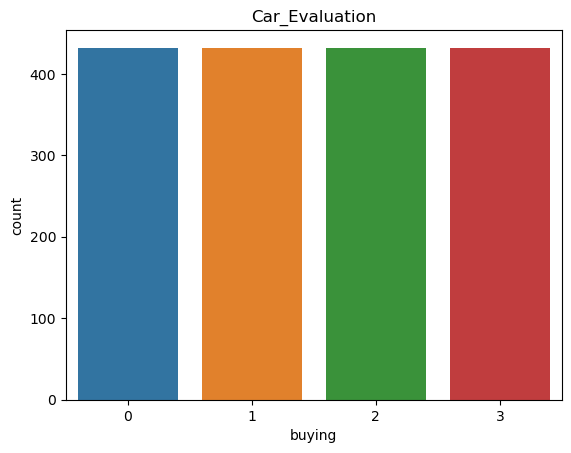

In [13]:
# 라벨링 결과 확인
# buying 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="buying")
plt.xlabel("buying")
plt.title("Car_Evaluation")

Text(0.5, 1.0, 'Car_Evaluation')

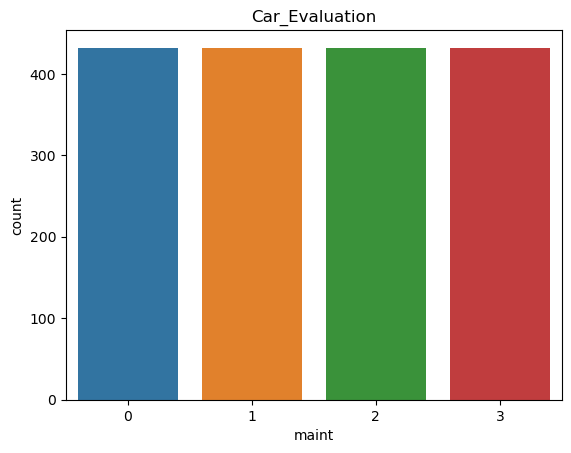

In [14]:
# 라벨링 결과 확인
# maint 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="maint")
plt.xlabel("maint")
plt.title("Car_Evaluation")

Text(0.5, 1.0, 'Car_Evaluation')

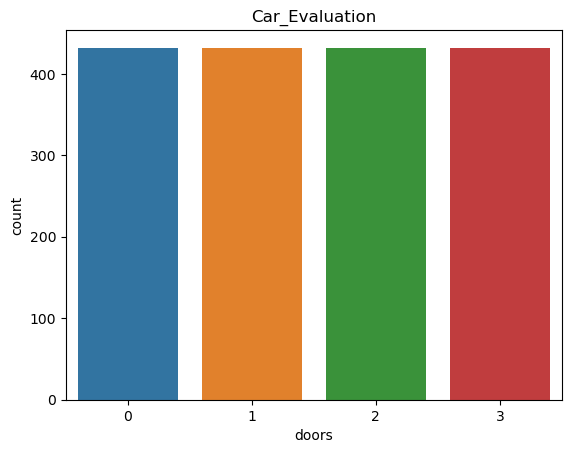

In [15]:
# 라벨링 결과 확인
# doors 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="doors")
plt.xlabel("doors")
plt.title("Car_Evaluation")

Text(0.5, 1.0, 'Car_Evaluation')

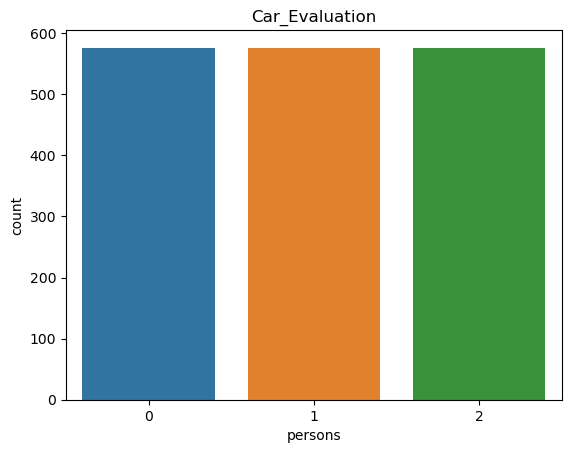

In [16]:
# 라벨링 결과 확인
# persons 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="persons")
plt.xlabel("persons")
plt.title("Car_Evaluation")

Text(0.5, 1.0, 'Car_Evaluation')

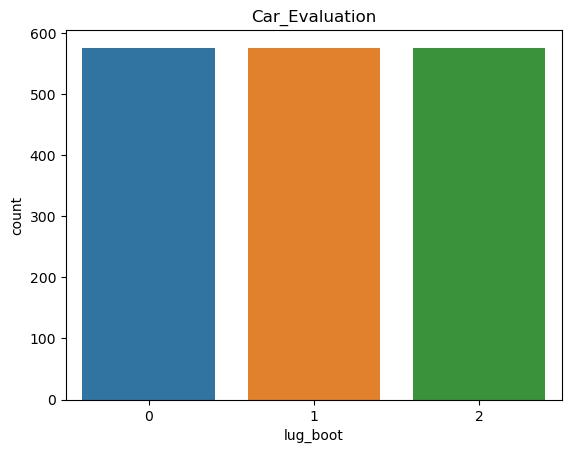

In [17]:
# 라벨링 결과 확인
# lug_boot 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="lug_boot")
plt.xlabel("lug_boot")
plt.title("Car_Evaluation")

Text(0.5, 1.0, 'Car_Evaluation')

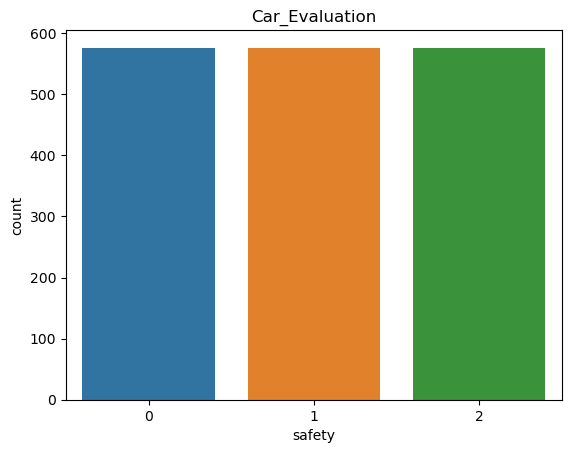

In [18]:
# 라벨링 결과 확인
# safety 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="safety")
plt.xlabel("safety")
plt.title("Car_Evaluation")

Text(0.5, 1.0, 'Car_Evaluation')

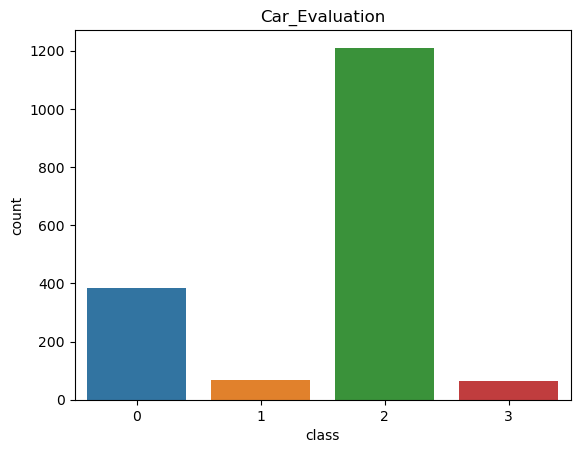

In [19]:
# 라벨링 결과 확인
# class 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("class")
plt.title("Car_Evaluation")

In [20]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [21]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [22]:
# 데이터 표준화

In [23]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()

# 특성 데이터를 표준화
std_scaled_data = scaler.fit_transform(df)

print(std_scaled_data)

[[ 1.34164079  1.34164079 -1.34164079 ...  1.22474487  0.
   0.51017691]
 [ 1.34164079  1.34164079 -1.34164079 ...  1.22474487  1.22474487
   0.51017691]
 [ 1.34164079  1.34164079 -1.34164079 ...  1.22474487 -1.22474487
   0.51017691]
 ...
 [-0.4472136  -0.4472136   1.34164079 ... -1.22474487  0.
   0.51017691]
 [-0.4472136  -0.4472136   1.34164079 ... -1.22474487  1.22474487
  -0.63177348]
 [-0.4472136  -0.4472136   1.34164079 ... -1.22474487 -1.22474487
   1.65212731]]


In [24]:
X=df.drop(['buying', 'class'], axis=1)

print(X.head(),"\n\n")

y=df['class']

print(y.value_counts())

   maint  doors  persons  lug_boot  safety
0      3      0        0         2       1
1      3      0        0         2       2
2      3      0        0         2       0
3      3      0        0         1       1
4      3      0        0         1       2 


class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


In [25]:
# One-Hot Encoding

In [26]:
y = pd.get_dummies(y).values
y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [27]:
# X,y 분류

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,maint,doors,persons,lug_boot,safety
520,3,3,0,0,2
621,0,3,0,2,1
1017,0,1,2,2,1
1273,1,3,0,1,2
924,3,2,0,0,1
...,...,...,...,...,...
835,1,2,2,0,2
1216,1,1,0,2,2
1653,1,1,0,0,1
559,0,0,2,2,2


In [29]:
print(X_test.shape)
print(X_train.shape)

(432, 5)
(1296, 5)


In [30]:
y_train

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False]])

In [31]:
print(y_test.shape)
print(y_train.shape)

(432, 4)
(1296, 4)


In [32]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam

model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='relu'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='softmax'))

#출력 유닛 수는 레이블 수에 맞게끔 변수를 맞춰 설정해줘야 함. 여기서는 12

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy', metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 884 (3.45 KB)

 Trainable params: 884 (3.45 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7052 - loss: 0.7906 - val_accuracy: 0.6898 - val_loss: 0.6857
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.6966 - loss: 0.6686 - val_accuracy: 0.7361 - val_loss: 0.6145
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.7644 - loss: 0.5395 - val_accuracy: 0.7407 - val_loss: 0.5060
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8168 - loss: 0.4298 - val_accuracy: 0.7569 - val_loss: 0.6279
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8127 - loss: 0.4328 - val_accuracy: 0.7569 - val_loss: 0.4764
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8319 - loss: 0.3755 - val_accuracy: 0.7847 - val_loss: 0.4338
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.8202 - loss: 0.3658 - val_accuracy: 0.7685 - val_loss: 0.5114
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8062 - loss: 0.4279 - val_accuracy: 0.78

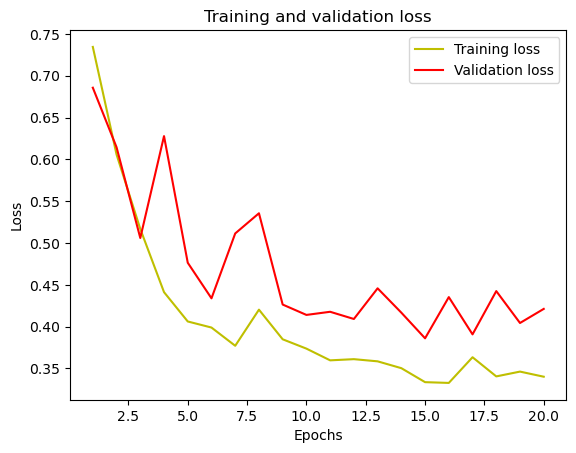

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

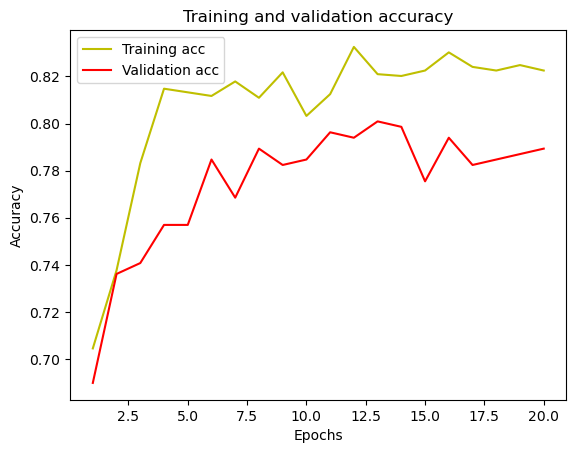

In [35]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
# 모델의 정확도 출력

In [37]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class),"\n")
print(confusion_matrix(y_test_class,y_pred_class),"\n")

              precision    recall  f1-score   support

           0       0.55      0.61      0.58        99
           1       0.00      0.00      0.00        21
           2       0.87      0.94      0.90       296
           3       1.00      0.12      0.22        16

    accuracy                           0.79       432
   macro avg       0.60      0.42      0.43       432
weighted avg       0.76      0.79      0.76       432
 

[[ 60   0  39   0]
 [ 21   0   0   0]
 [ 17   0 279   0]
 [ 11   0   3   2]] 



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
